# A very peculiar dart game

In this notebook, we will understand and explain a very strange dart game and then ask a question about an equally strange player playing the game. The rules of this game were inspired by a [numberphile youtube video](https://www.youtube.com/watch?v=6_yU9eJ0NxA) in which the answer was calculated theoretically.

#### In this notebook we aim to - 
+ Explaining the rules of the game and posing the question in a presentable manner.
+ Running a simulation to confirm the theoretical answer.

Note - This notebook will not have a detailed explaination on the derivation theoretical answer as it is more of an excersise in python, jupyter and markdown.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from time import sleep
from IPython.display import HTML
%matplotlib inline

First we start with a circular dartboard. Without loss of generality, we can represent it as a unit disk centered at the origin.

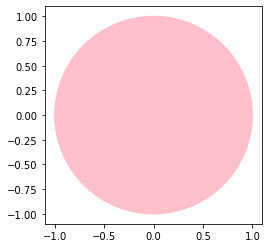

In [2]:
dartboard = plt.Circle((0, 0), radius=1, color='pink')
plt.gca().add_patch(dartboard)
plt.axis('scaled')

plt.show()

At this point the player throws a dart at the dartboard, for this example let's say it lands at *(0.25, 0.35)*. 
Now we can draw the line segment between the landing spot and the origin. We can then draw the shortest chord of the circle passing though that point. By geometry, we can prove that these 2 line segments are perpendicular. Note that **the length of the chord is directly proportional to the skill of the player**.

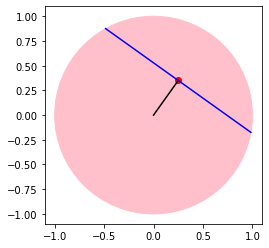

In [3]:
dartboard = plt.Circle((0, 0), radius=1, color='pink')
plt.gca().add_patch(dartboard)
plt.axis('scaled')

plt.plot(0.25, 0.35, color='red', marker='o')
line_from_origin = plt.Line2D((0, 0.25), (0, 0.35), color='black')
line_chord = plt.Line2D((-0.4846, 0.9846), (0.8747, -0.1747), color='blue')

plt.gca().add_line(line_from_origin)
plt.gca().add_line(line_chord)

plt.show()

The game rewards/punishes the player suitably depending upon how close the shot was to the bullseye. The better the shot (closer to the origin), the longer the chord is. Now, **the dartboard will shrink my decreasing the radius from 1 to exactly the half length of the chord.** Here this length is - 

$$
\text{New Radius } = \sqrt{1^2 - (0.25^2 + 0.35^2)} \approx 0.9027
$$

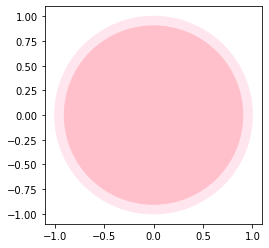

In [4]:
old_dartboard = plt.Circle((0, 0), radius=1, color='#ffe6ee')
new_dartboard = plt.Circle((0, 0), radius=np.sqrt(1 - (0.25**2 + 0.35**2)), color='pink')

plt.gca().add_patch(old_dartboard)
plt.gca().add_patch(new_dartboard)
plt.axis('scaled')

plt.show()

On the next throw, say we hit the board at *(0.6, -0.65)*, we first check if it is in the dartboard, which it is. Then the dartboard shrinks again by reducing the radius to the half length of the shortest chord passing through the hit point, *(0.6, -0.65)* here. Since this hit point is really close to the edge of the dartbaord, the dartboard now will shrink by a significant amount. The new radius is given by - 

$$
\text{New Radius} = \sqrt{0.9027^2 - (0.6^2 + (-0.65)^2)} \approx 0.1802
$$
More generally we can see this formula becomes - 
$$
\text{New Radius} = \sqrt{(\text{Old Radius})^2 - (\text{Distance of hitpoint from origin})^2}
$$

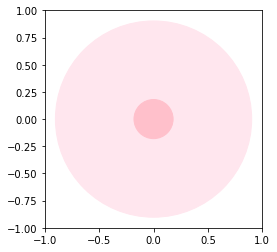

In [5]:
old_dartboard = plt.Circle((0, 0), radius=0.9027, color='#ffe6ee')
new_dartboard = plt.Circle((0, 0), radius=np.sqrt(0.9027**2 - (0.6**2 + 0.65**2)), color='pink')

plt.gca().add_patch(old_dartboard)
plt.gca().add_patch(new_dartboard)

plt.axis('scaled')
plt.xlim(-1, 1); plt.ylim(-1, 1)

plt.show()

Finally, for the third shot we hit at *(0.8, -0.3)*, which is outside the board making the game come to an end. 
This game is scored by the number of darts thrown **including the failed one.** This means here the score is 3.

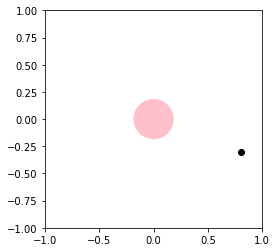

In [6]:
old_dartboard = plt.Circle((0, 0), radius=0.1802, color='pink')
plt.gca().add_patch(old_dartboard)

plt.axis('scaled')
plt.xlim(-1, 1); plt.ylim(-1, 1)

plt.plot(0.8, -0.3, color='black', marker='o')
plt.show()

Now that we have described the game and how it works, we will now describe the actual question which involves a player who plays this game. This player hits within the region $ [-1, 1]^2 $ with uniform probabilty, regardless of the size of the dartboard. That is if $(X, Y)$ is the point at which he hits, then -

$$
\begin{align}
X &\sim \mathcal{Unif}(0, 1) \text{  and} \\
Y &\sim \mathcal{Unif}(0, 1)
\end{align}
$$

Now the question is **what is the expected score of such a player?**. The theoretical answer is $e^{\frac{\pi}{4}} \approx 2.193$ 

##### We will confirm this with a simulation.

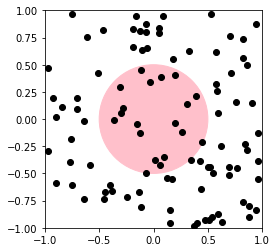

In [7]:
dartboard = plt.Circle((0, 0), radius=0.5, color='pink')
plt.gca().add_patch(dartboard)

plt.axis('scaled')
plt.xlim(-1, 1); plt.ylim(-1, 1)

for _ in range(100):
    x0, y0 = 2 * np.random.random(size=2) - 1
    plt.plot(x0, y0, color='black', marker='o')
    
plt.show()
    

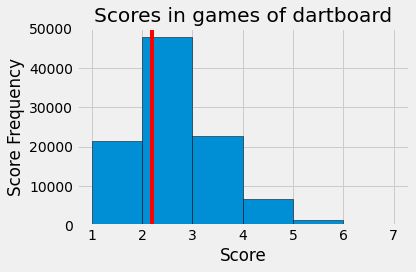

Score mean is 2.19347
Score standard deviation is 0.9098787606599024
Absolute error is 0.00018994926198478979
Relative error is 0.008661%


In [23]:
SIMULATION_SIZE = 10 ** 5

def update_radius(old_radius, hitpoint):
    """
    Takes in the old radius and the coordinates of the hit point. Returns the new radius as per the rules 
    of the game. If the hitpoint does not hit the dartboard as per the old radius, then returns 0.
    """
    x0, y0 = hitpoint
    squared_distance_of_hitpoint_from_origin = x0**2 + y0**2
    
    difference = old_radius**2 - squared_distance_of_hitpoint_from_origin
    if difference <= 0:
        return 0
    else:
        new_radius = np.sqrt(squared_distance_of_hitpoint_from_origin)
        return new_radius
    
def game():
    """
    This function runs a single game played by our player and returns the score.
    """
    radius = 1
    score = 0
    
    while radius:
        score += 1
        hitpoint = 2 * np.random.random(size=2) - 1
        radius = update_radius(radius, hitpoint)
    
    return score

scores = [game() for _ in range(SIMULATION_SIZE)]
score_mean = np.mean(scores)
score_stdev = np.std(scores)

plt.style.use('fivethirtyeight')
bins = [1, 2, 3, 4, 5, 6, 7]
plt.hist(scores, bins=bins, edgecolor='black')
plt.axvline(score_mean, color='red')

plt.title('Scores in games of dartboard')
plt.xlabel('Score')
plt.ylabel('Score Frequency')
plt.tight_layout()

plt.show()

print(f'Score mean is {score_mean}')
print(f'Score standard deviation is {score_stdev}')
print()

theoretical_mean = np.e**(np.pi/4)
absolute_error = abs(score_mean - theoretical_mean)
relative_error = absolute_error / theoretical_mean

print(f'Absolute error is {absolute_error}')
print(f'Relative error is {relative_error:.6%}')

We have a pretty small relative error, so it stands to reason that the theoretical answer $e^{\frac{\pi}{4}}$ is correct. If however you wish to recieve a more precise answer and standard deviation, then you can increase the SIMULATION_SIZE variable in the above cell and run the code again. By default, it is set to $10^5$. 
##### What follows now is a basic train of logic to how the theoretical answer is calculated.


##### Now, the expectation of the random variable S denoting the score of this game is - 

$$
\begin{align}
\mathbb{E}[S] &= \sum_{k=0}^\infty{k \cdot P(S=k)} \\
&= \sum_{k=1}^\infty{k \cdot P(S=k)} \\
&= \sum_{k=1}^\infty{k \cdot (P(S>k-1) - P(S>k))} \\
\end{align}
$$

We see this is a telescoping series

$$
\begin{align}
&= \sum_{k-1=0}^\infty{k\cdot P(S>k-1)} - \sum_{k=1}^\infty{k\cdot P(S>k)} \\
&= \sum_{k=0}^\infty{(k+1)\cdot P(S>k)} - \sum_{k=0}^\infty{k\cdot P(S>k)} \\
&= \sum_{k=0}^\infty{P(S>k)}
\end{align}
$$

Let us try and calculate the first few values of this series. We know the first point is guaranteed.

$$
P(S>0) = 1
$$

Now say the first shot hits at $(x_1, y_1) \in [-1, 1]^2$. Then if this point is in the unit circle, it means we have secured a second point. This is because the current radius is $R_1=1$ and the new radius becomes $R_2 = \sqrt{R_1^2 - (x_1^2 + y_1^2)}$

$$
\begin{align}
P(S>1) &= P(\text{First shot is a success}) \\
&= P((x_1, y_1) \in C(O, R_1) \\
&= P(x_1^2 + y_1^2 < 1) \\
&= \frac{\text{Area of unit circle}}{\text{Area of square}} \\
&= \frac{\pi}{4}
\end{align}
$$

The next shot hits at $(x_2, y_2)$. If this point is in the circle centered on the origin with radius $R_2$ then we have a third point. New radius is $R_3 = \sqrt{R_2^2 - (x_2^2 + y_2^2)}$

$$
\begin{align}
P(S>2) &= P((x_2, y_2) \in C(O, R_2)) \\
&= P(x_2^2 + y_2^2 < R_1^2 - (x_1^2 + y_1^2)) \\
&= P(x_2^2 + y_2^2 + x_1^2 + y_1^2 < 1) \\
&= \frac{\text{4-Volume of unit ball}}{\text{4-Volume of hypercube}} \\
&= \frac{\pi^2}{2} \cdot \frac{1}{2^4}
\end{align}
$$

In the general case we will have our $(k+1)$th point if the dart is in the circle centered on the origin with radius $R_k$

$$
\begin{align}
P(S>k) &= P((x_k, y_k) \in C(O, R_k)) \\
&= P(x_k^2 + y_k^2 < R_{k-1}^2 - (x_{k-1}^2 + y_{k-1}^2)) \\
&= P(x_k^2 + y_k^2 < R_{0}^2 - \sum_{i=1}^{k-1}{(x_{i}^2 + y_{i}^2)}) \\
&= P(x_k^2 + y_k^2 + \cdots + x_1^2 + y_1^2 < 1) \\
&= P(\sum_{i=1}^k{x_i^2 + y_i^2} < 1) \\
&= \frac{\text{2k-Volume of 2k dimensional ball}}{\text{2k-Volume of 2k dimensional hypercube}} \\
&= \frac{\pi^{k}}{k!} \cdot \frac{1}{2^{2k}}
\end{align}
$$

Finally

$$
\begin{align}
\mathbb{E}(S) &= \sum_{k=0}^\infty{P(S>k)} \\
&= \sum_{k=0}^\infty{\frac{\pi^k}{k!} \cdot \frac{1}{2^{2k}}} \\
&= \sum_{k=0}^\infty{\frac{(\frac{\pi}{4})^k}{k!}} \\
&= e^\frac{\pi}{4} \\
\end{align}
$$